In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
# data 설정하기
data = pd.read_csv('../dataset/heartattack/heart.csv')

print(data.head(50))
print("\n")
print(data.dtypes)

data['sex'] = data['sex'].astype('category') # 성별 category
data['cp'] =  data['cp'].astype('category') # 가슴통증 category
data['fbs'] = data['fbs'].astype('category') # 혈중 당 category
data['restecg'] = data['restecg'].astype('category')
data['exng'] = data['exng'].astype('category')
data['output'] = data['output'].astype('category')

trainX, testX, trainY, testY = \
    train_test_split(data[[col for col in data.columns if col not in 'output']], data['output'], test_size=0.2)

    age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0    63    1   3     145   233    1        0       150     0      2.3    0   
1    37    1   2     130   250    0        1       187     0      3.5    0   
2    41    0   1     130   204    0        0       172     0      1.4    2   
3    56    1   1     120   236    0        1       178     0      0.8    2   
4    57    0   0     120   354    0        1       163     1      0.6    2   
5    57    1   0     140   192    0        1       148     0      0.4    1   
6    56    0   1     140   294    0        0       153     0      1.3    1   
7    44    1   1     120   263    0        1       173     0      0.0    2   
8    52    1   2     172   199    1        1       162     0      0.5    2   
9    57    1   2     150   168    0        1       174     0      1.6    2   
10   54    1   0     140   239    0        1       160     0      1.2    2   
11   48    0   2     130   275    0        1       139     0    

In [68]:
dir(sns)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

<Figure size 1080x720 with 0 Axes>

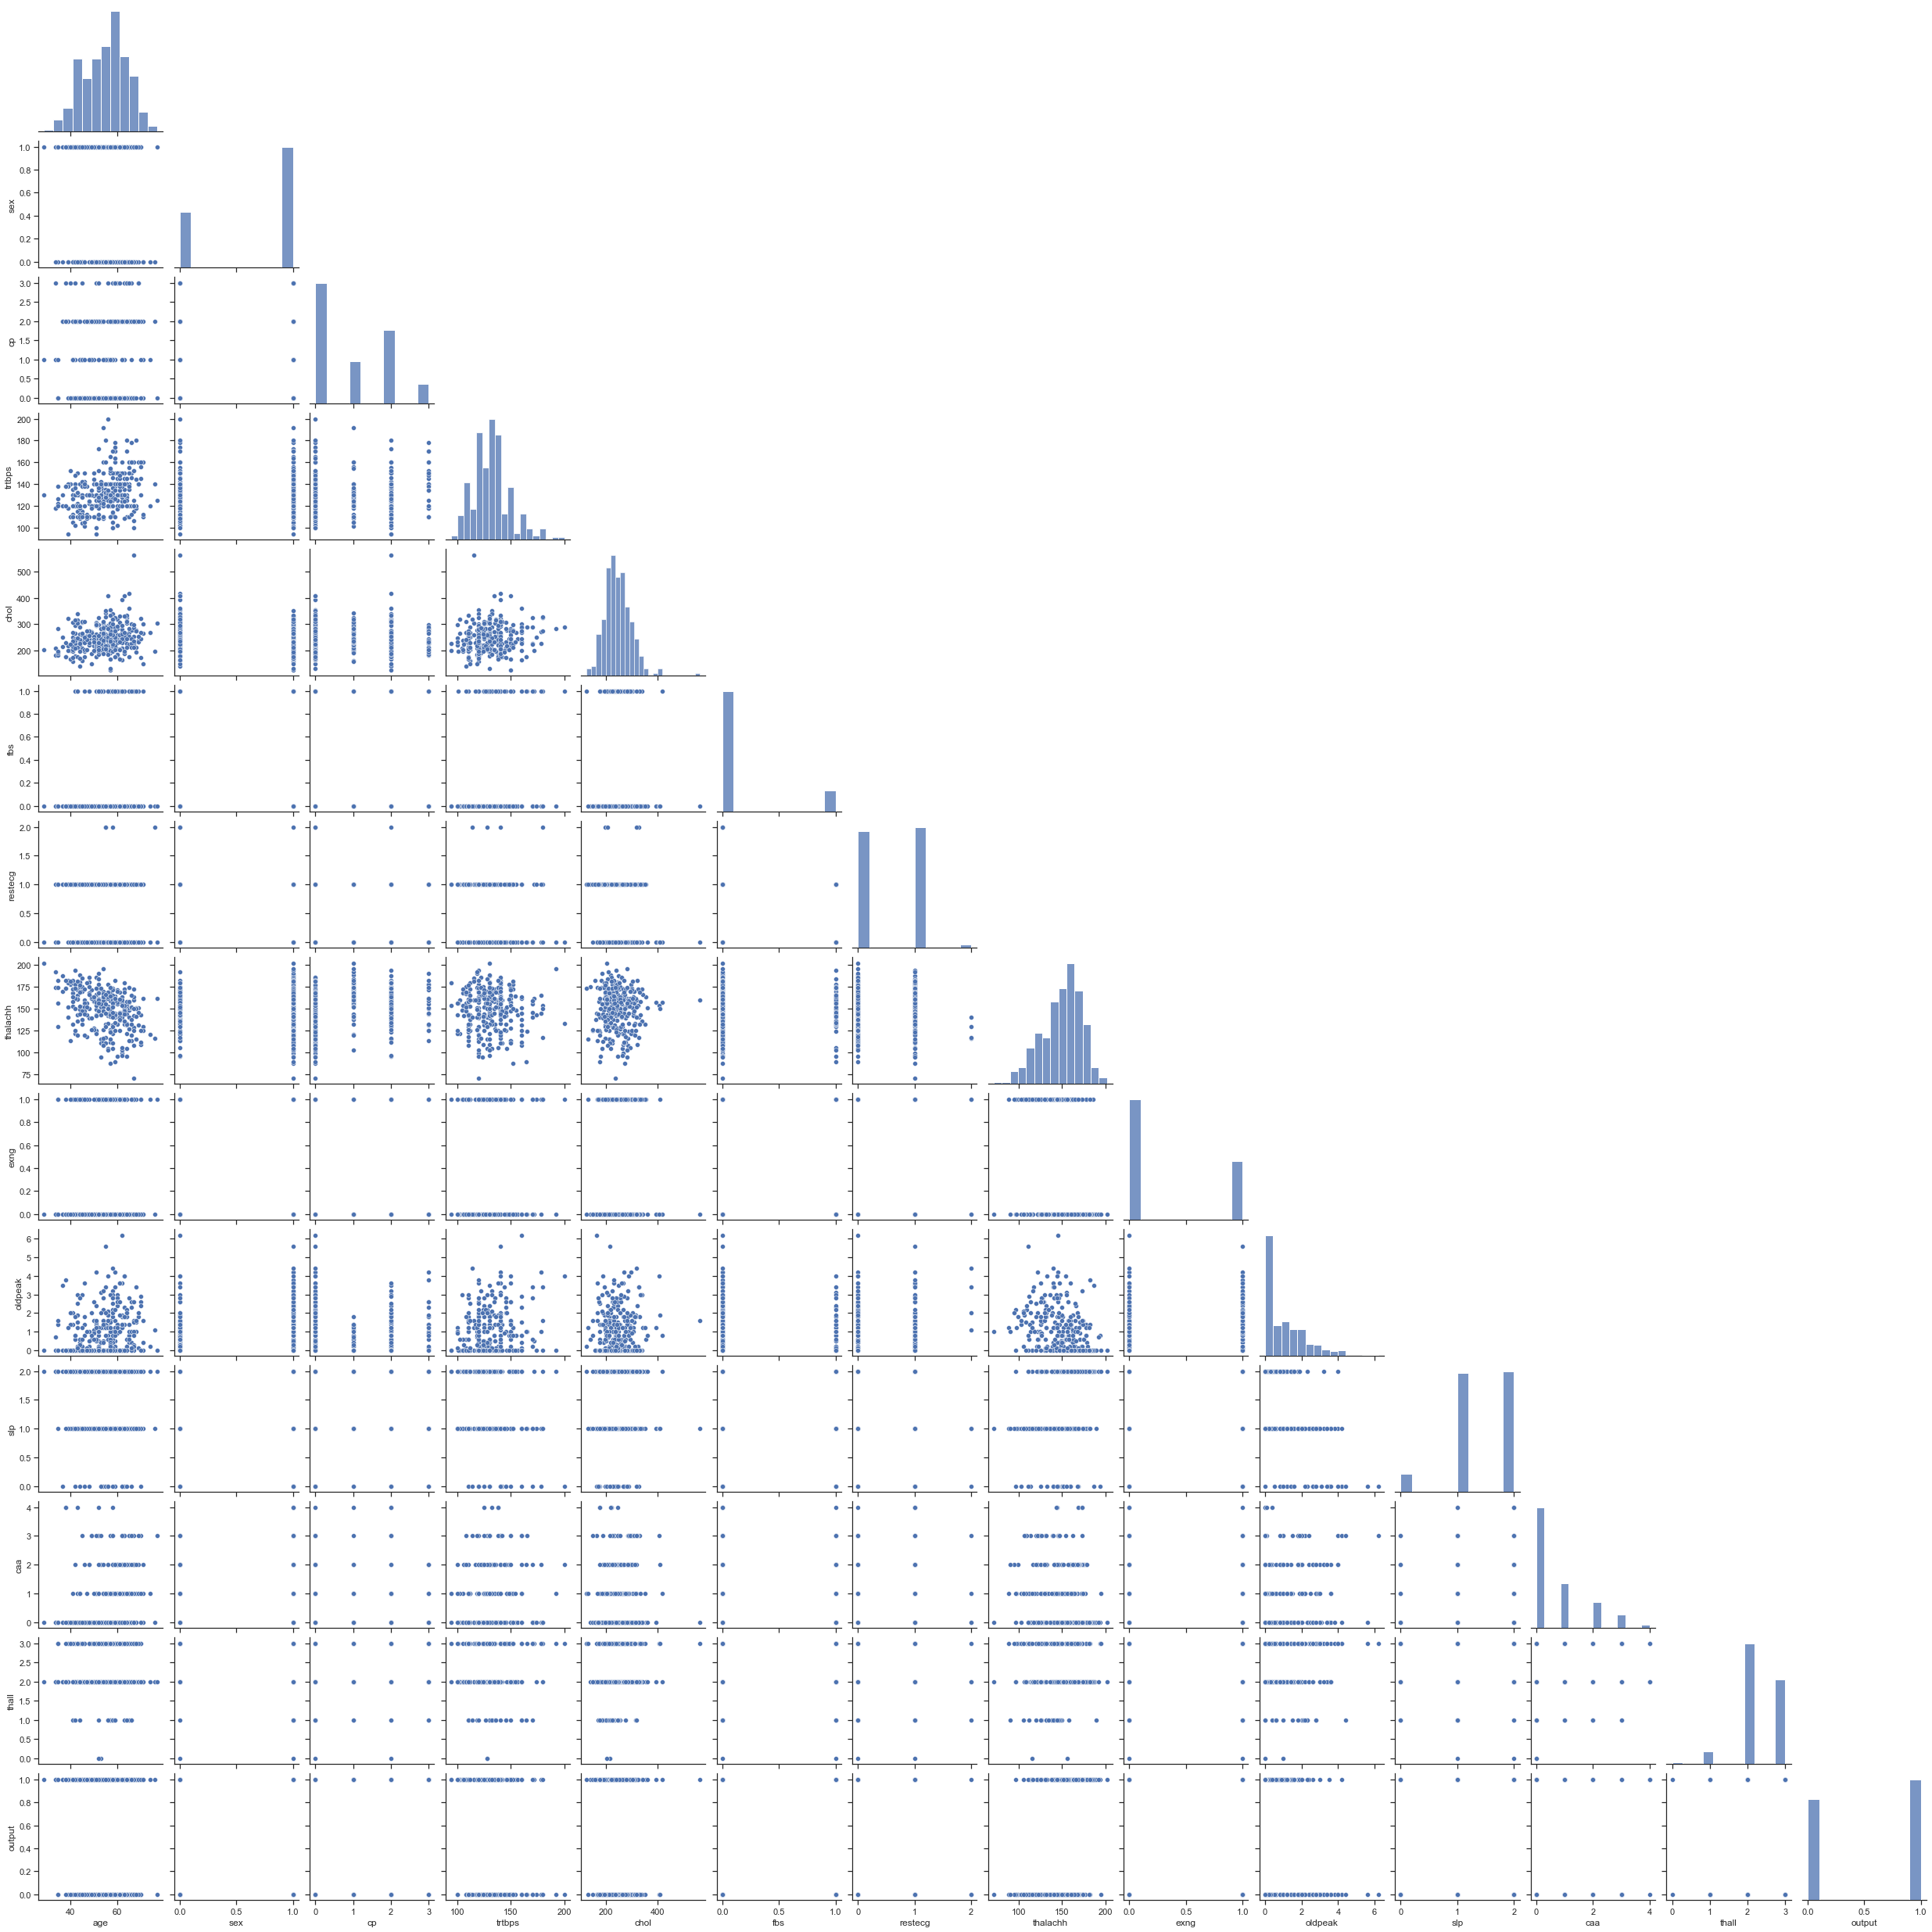

In [71]:
# EDA
data = pd.read_csv('../dataset/heartattack/heart.csv')
sns.set_theme(style="ticks")

plt.figure(figsize=(15,10))
sns.pairplot(data = data, corner = True)
plt.show()

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(max_depth=5, n_estimators=100)
rf.fit(trainX, trainY)

# 학습데이터와 시험데이터의 정확도를 측정한다.
print('\n학습데이터의 정확도 = %.2f' % rf.score(trainX, trainY))
print('시험데이터의 정확도 = %.2f' % rf.score(testX, testY))

# 시험데이터의 confusion matrix를 작성한다 (row : actual, col : predict)
predY = rf.predict(testX)
print('\nConfusion matrix :')
print(confusion_matrix(testY, predY))
print()
print(classification_report(testY, predY))


학습데이터의 정확도 = 0.95
시험데이터의 정확도 = 0.87

Confusion matrix :
[[26  2]
 [ 6 27]]

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.93      0.82      0.87        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



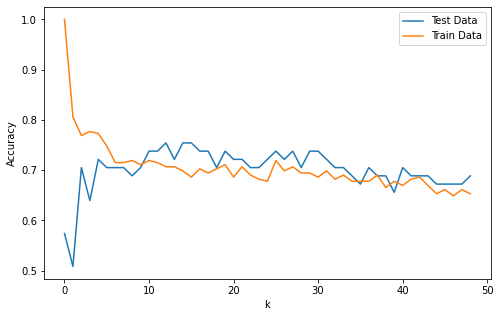

가장 높은 Test Accuracy:  0.7540983606557377


In [55]:
# knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(trainX, trainY)

testAcc = []
trainAcc = []

for k in range(1, 50):
    # KNN 으로 Train 데이터 세트를 학습한다.
    knn = KNeighborsClassifier(n_neighbors=k, p=2, metric='minkowski')
    knn.fit(trainX, trainY)

    # Test 세트의 Feature에 대한 정확도
    predY = knn.predict(testX)
    testAcc.append((testY == predY).sum() / len(predY))

    # Train 세트의 Feature에 대한 정확도
    predY = knn.predict(trainX)
    trainAcc.append((trainY == predY).sum() / len(predY))

plt.figure(figsize=(8, 5))
plt.plot(testAcc, label="Test Data")
plt.plot(trainAcc, label="Train Data")
plt.legend()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

print("가장 높은 Test Accuracy: ", max(testAcc))

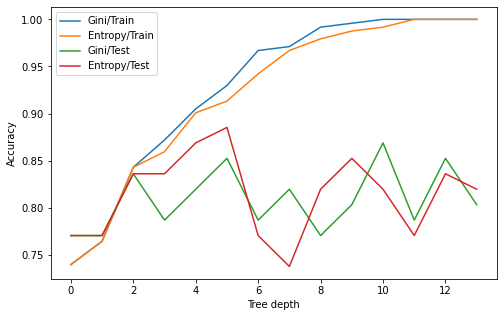

가장 높은 Test Accuracy:  0.7540983606557377


In [50]:
from sklearn.tree import DecisionTreeClassifier

trainGini = []
testGini = []
trainEntropy = []
testEntropy = []
for k in range(1, 15):
    # Gini 계수를 사용하여 학습 데이터를 학습한다.
    dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
    dt.fit(trainX, trainY)

    # 정확도를 측정한다.
    trainGini.append(dt.score(trainX, trainY))
    testGini.append(dt.score(testX, testY))

    # Entropy를 사용하여 학습 데이터를 학습한다.
    dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
    dt.fit(trainX, trainY)

    # 정확도를 측정한다.
    trainEntropy.append(dt.score(trainX, trainY))
    testEntropy.append(dt.score(testX, testY))

plt.figure(figsize=(8, 5))
plt.plot(trainGini, label="Gini/Train")
plt.plot(trainEntropy, label="Entropy/Train")
plt.plot(testGini, label="Gini/Test")
plt.plot(testEntropy, label="Entropy/Test")
plt.legend()
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.show()

print("가장 높은 Test Accuracy: ", max(testAcc))

In [ ]:
from sklearn.svm import SVC
import mglearn

model = SVC(kernel='linear')

c_list= np.arange(1,10,1)
score_list= []

model = SVC(kernel='linear')

for c in c_list:
    model= SVC(kernel='linear',C= c)
    model.fit(trainX, trainY)

    score_list.append(model.score(testX,testY))

plt.plot(score_list)

model.fit(trainX, trainY)

# Test 세트의 Feature에 대한 class를 추정하고, 정확도를 계산한다
print()
print("* 학습용 데이터로 측정한 정확도 = %.2f" % model.score(trainX, trainY))
print("* 시험용 데이터로 측정한 정확도 = %.2f" % model.score(testX, testY))